# **< scikit-learn toy datasets 다루기 >**

### `[Project 1]`  load_digits : 손글씨를 분류해 봅시다

---

#### **1-1 데이터 준비**

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

#### **1-2 데이터 이해하기**

In [5]:
# Feature Data 지정하기

digits_data = digits.data
digits_data.shape

(1797, 64)

In [6]:
# 샘플 Data 확인하기

digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

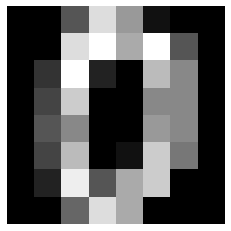

In [7]:
# 샘플 Data 이미지로 확인하기

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

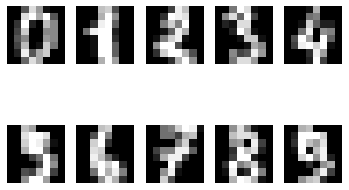

In [8]:
# 여러 Data 이미지로 확인하기

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [9]:
# Label Data 지정하기

digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# Target Names 출력해 보기

digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# 데이터 Describe 해 보기

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### **1-3 train, test 데이터 분리**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=15)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


#### **1-4 다양한 모델로 학습시키고 에측해보기**

In [13]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.82      0.82      0.82        38
           2       0.72      0.87      0.79        38
           3       0.85      0.81      0.83        27
           4       0.97      0.78      0.86        41
           5       0.82      0.89      0.85        35
           6       0.85      0.89      0.87        38
           7       0.91      0.91      0.91        34
           8       0.74      0.74      0.74        35
           9       0.83      0.79      0.81        43

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



In [14]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.95      0.97      0.96        38
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        27
           4       0.95      1.00      0.98        41
           5       0.97      1.00      0.99        35
           6       1.00      0.95      0.97        38
           7       1.00      1.00      1.00        34
           8       0.94      0.97      0.96        35
           9       1.00      0.98      0.99        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [15]:
# Support Vector Machine

from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [16]:
# SGD classifier

from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.94      0.87      0.90        38
           2       1.00      0.97      0.99        38
           3       0.96      0.85      0.90        27
           4       0.98      1.00      0.99        41
           5       0.92      1.00      0.96        35
           6       0.97      0.97      0.97        38
           7       0.97      1.00      0.99        34
           8       0.80      0.94      0.87        35
           9       0.97      0.91      0.94        43

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [17]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.98      1.00      0.99        41
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.92      0.97      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### **1-5 모델 평가하기**

|모델|precision(weighted)|recall(weighted)|f1-score(weighted)|accuracy|
|---|---|---|---|---|
|Decision Tree|0.85|0.84|0.84|0.84|
|Random Forest|0.98|0.98|0.98|0.98|
|SVM|0.98|0.98|0.98|0.98|
|SGD Classifier|0.96|0.96|0.96|0.96|
|Logistic Regression|0.98|0.97|0.97|0.97|

In [18]:
# 데이터 분포 확인

import pandas as pd

df_digits = pd.DataFrame(digits.data)
df_digits['label'] = digits.target
df_digits.label.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

> - **손글씨(digits)의 경우 정확도(accruacy)가 가장 높은 Random Forest 또는 SVM을 모델을 사용하는 것이 적합하다.**
>
>
> - 그이유는 손글씨 데이터의 경우 자료의 분포를 확인해보면 심하게 불균형하다고 하기 어렵다. 가장 많은 손글씨 데이터는 숫자 3으로 183개이고, 가장 적은 손글씨 데이터는 숫자 8로 174개인데 둘 의 차이가 크지 않다.
>
>
> - 또한 각 모델별 report를 살펴보면, 9개 클래스의 precision과 recall의 차이가 크지 않고 precision weighted avg와 recall weighted avg의 차이도 거의 없음을 확인 할 수 있다.
>
>
> - 따라서 데이터가 불균형하지 않고, 정밀도(precicison)와 재현율(recall)이 차이가 크지 않음으로, 정확도(accuracy)를 평가지표로 사용해도 충분하다고 생각된다.

### `[Project 2]`  load_wine : 와인을 분류해 봅시다

---

#### **1-1 데이터 준비**

In [19]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### **1-2 데이터 이해하기**

In [20]:
# Feature Data 지정하기

wine_data = wine.data
wine_data.shape

(178, 13)

In [21]:
# Label Data 지정하기

wine_label = wine.target
print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
# Target Names 출력해 보기

wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [23]:
# 데이터 Describe 해 보기

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### **1-3 train, test 데이터 분리**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


#### **1-4 다양한 모델로 학습시키고 에측해보기**

In [25]:
# for문으로 한 번에 모델을 학습시키고 평가하기!

models = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)   
    print('<', i, '>')
    print(classification_report(y_test, y_pred))
    print(' ')    

< DecisionTreeClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

 
< RandomForestClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

 
< SVC() >
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### **1-5 모델 평가하기**

|모델|precision(weighted)|recall(weighted)|f1-score(weighted)|accuracy|
|---|---|---|---|---|
|Decision Tree|0.95|0.94|0.94|0.94|
|Random Forest|1.00|1.00|1.00|1.00|
|SVM|0.55|0.61|0.54|0.61|
|SGD Classifier|0.40|0.53|0.44|0.53|
|Logistic Regression|0.97|0.97|0.97|0.97|

In [26]:
# 데이터 분포 확인

df_wine = pd.DataFrame(wine.data)
df_wine['label'] = wine.target
df_wine.label.value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

> - **와인 데이터는 f1_score가 가장 높은 'Random Forest'를 모델로 사용하는 것이 적합하다.**
>
>
> - 먼저, 와인데이터가 class_0 59개, class_1 71개, class_2 48개로 불균형하게 분류되어 있어 단순하게 accuracy로 평가하는 것보다 다른 지표도 확인해보는 것이 좋겠다고 판단했다.
>
>
> - 실제로 SVM, SGD Classifier 모델에서는 precision과 recall의 차이가 눈에 띄게 확인된다.
>
>
> - 와인 분류는 스팸메일 분류(정상 메일을 스팸메일로 분류)나 암 진단(양성을 음성으로 진단) 처럼 잘못된 분류로 생기는 손해나 피해가 막중하지는 않은 데이터 같다.
>
>
> - 따라서 precision과 recall을 모두 균형있게 반영하는 f1_score로 모델을 평가하는 것이 적절한 것 같다.
>
>
> - 참고 : [머신러닝 분류 모델의 성능 평가 지표 Accuracy, Recall, Precision, F1](https://hleecaster.com/ml-accuracy-recall-precision-f1/)

### `[Project 3]`  load_breast_cancer : 유방암 여부를 진단해 봅시다

---

#### **1-1 데이터 준비**

In [27]:
from sklearn.datasets import load_breast_cancer

breast_cancer= load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### **1-2 데이터 이해하기**

In [28]:
# Feature Data 지정하기

breast_cancer_data = breast_cancer.data
breast_cancer_data.shape

(569, 30)

In [29]:
# Label Data 지정하기

breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
# Target Names 출력해 보기

breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [31]:
# 데이터 Describe 해 보기

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### **1-3 train, test 데이터 분리**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


#### **1-4 다양한 모델로 학습시키고 에측해보기**

In [41]:
# for문으로 한 번에 모델을 학습시키고 평가하기!

models = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)   
    print('<', model, '>')
    print(classification_report(y_test, y_pred))
    print(' ')

< DecisionTreeClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

 
< RandomForestClassifier(random_state=32) >
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

 
< SVC() >
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96   

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### **1-5 모델 평가하기**

|모델|precision(weighted)|recall(weighted)|f1-score(weighted)|accuracy|
|---|---|---|---|---|
|Decision Tree|0.95|0.95|0.95|0.95|
|Random Forest|0.97|0.96|0.96|0.96|
|SVM|0.95|0.95|0.95|0.95|
|SGD Classifier|0.87|0.84|0.83|0.84|
|Logistic Regression|0.96|0.96|0.96|0.96|

In [42]:
# 데이터 분포 확인

df_breast_cancer = pd.DataFrame(breast_cancer_data)
df_breast_cancer['label'] = breast_cancer.target
df_breast_cancer.label.value_counts()

1    357
0    212
Name: label, dtype: int64

> - **유방암 데이터는 recall이 가장 높은 'Random Forest' 또는 'Logistic Regression'를 모델로 사용하는 것이 적합하다.**
>
>
> - 먼저, 유방암 데이터의 분포를 살펴보면, Malignant(악성) 212개, Benign(양성) 357개로 불균형하게 구성되어있다. 의료데이터 특성상 암에 걸린 사람보다 암에 걸리지 않은 사람의 데이터가 많을 수 밖에 없을 것이다. 즉, 모델을 평가할 때 단순히 정확도(accuracy)만 보면 안되겠다.
>
>
> - 또한 암은 암에 걸렸는데 걸리지 않았다고 오진하는 경우, 환자 건강과 생명에 피해가 심각하다. 따라서 실제로 암에 걸렸는데(true) 모델이 걸렸다고(true) 판단하는 것이 중요하다. 이와 관련된 평가 지표가 바로 재현율(recall)이다.
>
>
> - 그러므로 recall을 기준으로 모델을 평가하는 것이 적절할 것이다.

### `[정리]`

---

평가지표에는 정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 스코어(f1 score)가 있고, 이것은 정담과 오답을 구분하여 표현하는 방법인 오차행렬(confusion matrix)를 통해 확인할 수 있으며, 데이터의 특성에 따라 어떤 것을 평가지표로 사용할 것인지 정해야 한다.

> - **손글씨(digits)의 경우 정확도(accruacy)가 가장 높은 Random Forest 또는 SVM을 모델을 사용하는 것이 적합하다.**
>
>
> - **와인 데이터는 f1_score가 가장 높은 'Random Forest'를 모델로 사용하는 것이 적합하다.**
>
>
> - **유방암 데이터는 재현율(recall)이 가장 높은 'Random Forest' 또는 'Logistic Regression'를 모델로 사용하는 것이 적합하다.**

### `[회고]`

---

1. 모델을 학습시키고 평가하기 전에, 데이터에 대해 충분히 이해하는 것이 중요하다는 것을 알게되었다.


2. 가장 성능이 좋은 모델을 얻으려면, 데이터의 특성을 고려하여 여러가지 모델의 평가지표를 보고 판단해야함을 알게 되었다.


3. 모델 학습 및 평가를 조금 더 쉽게 하는 방법을 찾던 중에 `GridSearchCV`에 대해 알게 되었으나 아직 코딩 실력이 부족하여 이번 노드에 적용까지는 못해봤다. 다음에 또 모델 평가에 관해 나오게 되면 적용해보아야 겠다.
    - 참고 : [[Machine learning] 쉽게 설명하는 Grid search - 모델 성능을 최고로 만드는 hyper parameter를 찾아서 (200727)](https://huidea.tistory.com/32)   